# Metrics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
from sklearn.datasets import load_iris,make_moons,make_blobs,make_regression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,\
    roc_curve,roc_auc_score,precision_recall_curve,accuracy_score,classification_report,\
    mean_squared_error,r2_score

### Part 1: Regression

A simple linear regression problem:

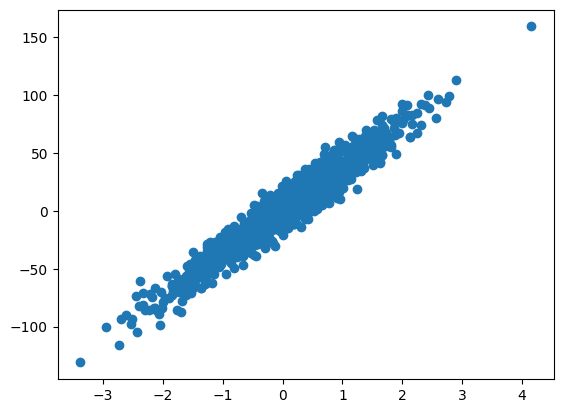

In [2]:
X,y=make_regression(n_samples=1000, n_features=1,noise=10.0)

plt.scatter(X,y)
plt.show()

In [3]:
model=LinearRegression().fit(X,y)

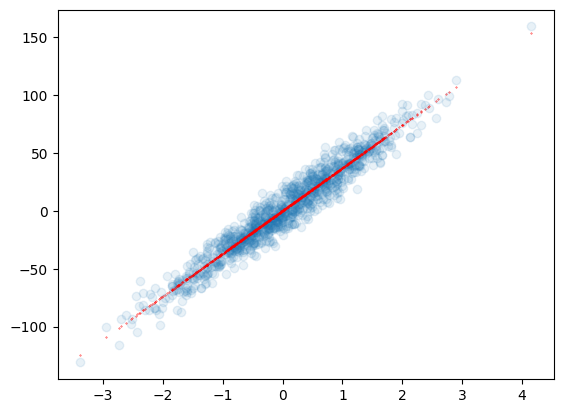

In [4]:
y_pred=model.predict(X)

plt.scatter(X,y,alpha=0.1)
plt.scatter(X,y_pred,color='red',s=0.1)
plt.show()

In [5]:
print("Mean squared error: {}".format(mean_squared_error(y,y_pred)))
print("R2 score: {}".format(r2_score(y,y_pred)))

Mean squared error: 94.85057722651692
R2 score: 0.9370055304589495


Rescaling the data:

In [6]:
y=0.01*y

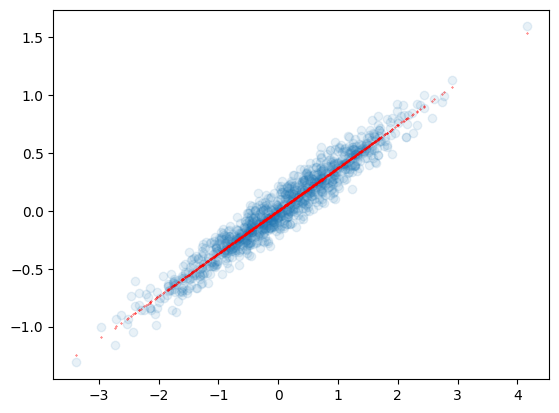

In [7]:
model=LinearRegression().fit(X,y)
y_pred=model.predict(X)

plt.scatter(X,y,alpha=0.1)
plt.scatter(X,y_pred,color='red',s=0.1)
plt.show()

In [8]:
print("Mean squared error: {}".format(mean_squared_error(y,y_pred)))
print("R2 score: {}".format(r2_score(y,y_pred)))

Mean squared error: 0.009485057722651692
R2 score: 0.9370055304589495


### Part 2: Binary Classification

We use the synthetic 'moons' data:

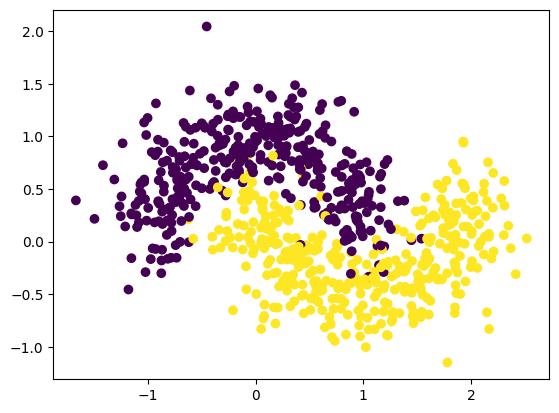

In [9]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

We look at the performance of SVM classifiers. Note that precision, recall and F1 here are maybe not so meaningful, since there is no natural 'positive' (minority) class here.

In [10]:
kernel_svm = SVC(kernel='rbf', gamma=0.1).fit(X_train,y_train)
predictions = kernel_svm.predict(X_test)
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test,predictions)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1)))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1)))


Confusion matrix:  
[[107  18]
 [ 14 111]]

Precision: 
0.8604651162790697

Recall: 
0.888

F1: 
0.8740157480314961


Now looking at the ROC curve:

Area under curve: 
0.9415680000000001


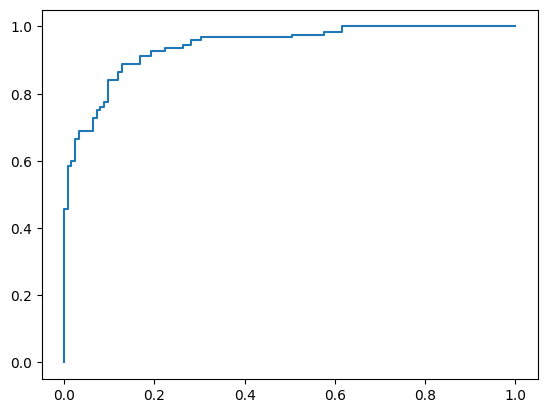

In [11]:
fprSVM,tprSVM,thresh = roc_curve(y_test,kernel_svm.decision_function(X_test))
plt.plot(fprSVM,tprSVM)
print("Area under curve: \n{}".format(roc_auc_score(y_test,kernel_svm.decision_function(X_test))) )

Precision-Recall curve:

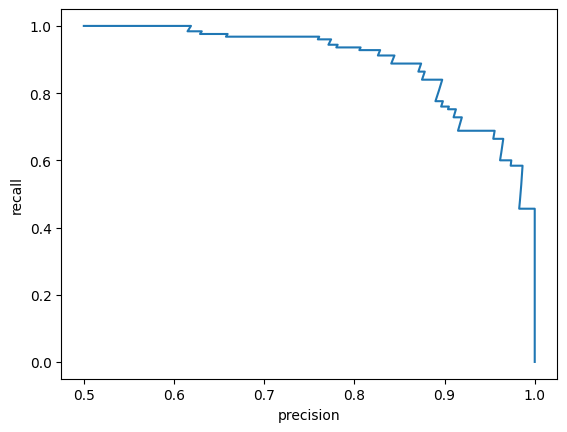

In [12]:
precSVM,recSVM,thresh = precision_recall_curve(y_test,kernel_svm.decision_function(X_test))
plt.xlabel('precision')
plt.ylabel('recall')
plt.plot(precSVM,recSVM)
plt.show()

**Exercise 1:** Define separate costs for false positive and false negative classifications (assume that all correct classifications have zero cost). What is the expected misclassification loss that you get from the "default" classifier characterized by the confustion matrix above?  What is the minimal expected cost you can get from any of the points on the ROC curve?


In [55]:
fp = confusion_matrix(y_test,predictions)[0][1]
fn = confusion_matrix(y_test,predictions)[1][0]
tp = confusion_matrix(y_test,predictions)[1][1]
tn = confusion_matrix(y_test,predictions)[0][0]

n = tn + fp
p = fn + tp

tpr_increases = [0]
for i in range(len(tprSVM)-1):
    if tprSVM[i+1] <= tprSVM[i]:
        tpr_increases.append(1)
    else:
        tpr_increases.append(0)

cost = np.multiply(tpr_increases, n)*fprSVM - np.multiply(tpr_increases, p)*tprSVM + np.multiply(tpr_increases, p)
print(cost)

[  0.   0.   0.  69.   0.  54.   0.  53.   0.  46.   0.  47.   0.  43.
   0.  41.   0.  41.   0.  40.   0.  35.   0.  33.   0.  35.   0.  35.
   0.  37.   0.  41.   0.  42.   0.  43.   0.  67.   0.  75.   0.  79.
   0. 125.]
[0.    0.008 0.456 0.456 0.584 0.584 0.6   0.6   0.664 0.664 0.688 0.688
 0.728 0.728 0.752 0.752 0.76  0.76  0.776 0.776 0.84  0.84  0.864 0.864
 0.888 0.888 0.912 0.912 0.928 0.928 0.936 0.936 0.944 0.944 0.96  0.96
 0.968 0.968 0.976 0.976 0.984 0.984 1.    1.   ]


**Exercise 2 (self study):** try some other classifier(s) on this dataset, and compare their ROC/PR-curves. Do you find a classifier that strictly dominates  another in the sense that its ROC curve is always above the other? Define several different cost functions, so that different types of classifiers provide optimal solutions for different cost functions. 

###  Part 3: Multiclass Metrics

Constructing the confusion matrix from the slides from imaginary true and predicted label arrays:

In [38]:
truelabels = np.arange(220)
truelabels[0:100]=1
truelabels[100:110]=2
truelabels[110:120]=3
truelabels[120:220]=4
predlabels = np.arange(220)
predlabels[0:89]=1
predlabels[89:93]=2
predlabels[93:97]=3
predlabels[97:100]=4
predlabels[100:103]=2
predlabels[103:106]=3
predlabels[106:110]=4
predlabels[110:112]=1
predlabels[112:120]=3
predlabels[120:121]=1
predlabels[121:122]=3
predlabels[122:220]=4

In [39]:
print("Confusion matrix:  \n{}\n".format(confusion_matrix(truelabels,predlabels)))
print("Accuracy: \n{}\n".format(accuracy_score(truelabels,predlabels)))

Confusion matrix:  
[[89  4  4  3]
 [ 0  3  3  4]
 [ 2  0  8  0]
 [ 1  0  1 98]]

Accuracy: 
0.9



Now let's look at the averaged binary scores:



In [40]:
print("One-vs-all measures: \n{}\n".format(classification_report(truelabels,predlabels)))
print("Macro average F1: \n{}\n".format(f1_score(truelabels,predlabels,average='macro')))
print("Micro average F1: \n{}\n".format(f1_score(truelabels,predlabels,average='micro')))

One-vs-all measures: 
              precision    recall  f1-score   support

           1       0.97      0.89      0.93       100
           2       0.43      0.30      0.35        10
           3       0.50      0.80      0.62        10
           4       0.93      0.98      0.96       100

    accuracy                           0.90       220
   macro avg       0.71      0.74      0.71       220
weighted avg       0.91      0.90      0.90       220


Macro average F1: 
0.7128766715410366

Micro average F1: 
0.9



**Exercise 3:** Construct two different 4x4 confusion matrices C1, C2, such that C1 has a higher accuracy score than C2, but C2 has a higher macro F1 score than C1.

In [58]:
predlabels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [57]:
# Constructing a multiclass confusion matrix
def multiclass_confusion_matrix(y_true, y_pred, labels=[1,2,3,4]):
    n_labels = len(labels)
    confusion_matrix = np.zeros((n_labels, n_labels), dtype=np.int)
    for i in range(len(y_true)):
        confusion_matrix[y_true[i], y_pred[i]] += 1
    return confusion_matrix

print("Multiclass confusion matrix:  \n{}\n".format(multiclass_confusion_matrix(truelabels,predlabels)))

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### Part 3 Calibration

We use a fairly big sample from the make_moons data generator:

In [ ]:
X, y = make_moons(n_samples=30000, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

Learn a Naive Bayes and a Neural network model:

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=[10],activation='tanh',solver='lbfgs', random_state=0).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

Construct histograms showing the distribution of probability predictions for the positive class. Histograms that are more concentrated at the extreme ends represent classifiers that are more 'confident' in their predictions

In [ ]:
#print(mlp.predict_proba(X_test))
nnposprobas=mlp.predict_proba(X_test)[:,1]
nbposprobas=nb.predict_proba(X_test)[:,1]
pddf = pd.DataFrame({'NN' : nnposprobas, 'NB' : nbposprobas})
pddf.plot.hist(bins=20,alpha=0.4)
plt.show()

This distribution says nothing about calibration. For that we create a graph that plots the value *b* of the predicted probability for the positive class against the proportion of actually positive datapoints in the small interval (*b*,*b+binwidth*). We also plot a relative measure for how many datapoints fall into each bin.

In [ ]:
# posprobas=nbposprobas
# posprobas=nnposprobas

titles=["Naive Bayes","Multi layer perceptron"]

for j,posprobas in enumerate([nbposprobas,nnposprobas]):

    binwidth=0.05
    bins = np.arange(0,1,binwidth)
    predperc = np.zeros(bins.size)
    binexamples = np.zeros(bins.size)

    for i,b in enumerate(bins):
        preds = y_test[(posprobas >= b) & (posprobas < b+binwidth) ]
        predperc[i] = np.sum(preds)/preds.size
        binexamples[i]=preds.size

    binexamples*=1/np.max(binexamples)

    plt.plot(bins,predperc,c='r')
    plt.plot(bins,binexamples,c='b')
    plt.plot(bins,bins,c='black')
    plt.title(titles[j])
    plt.show()

We see that the naive Bayes curve follows the diagonal more closely, and thus it seems a bit better calibrated than the neural network. However, the deviations from the diagonal in the neural network case are caused by rather few examples. 